In [1]:
import numpy as np
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import Networks
plt.rcParams['text.usetex'] = True

***

# Hopfield Network

In [ ]:
β = 1000
N = 500
Kv1 = [30, 50, 100]
mu = 0
MC_steps, loop, updates = [100, 10, 100]

### Calculating the basin of attraction by varying the number of Patterns (K)

In [6]:
magn_mean_start_k = []
magn_mean_end_k = []
for k in tqdm(Kv1):
    magn_mean_start = []
    magn_mean_end = []
    for r in np.linspace(0,1, 10):
        Hebb_Net = Networks.Hopfield_Network()
        Hebb_Net.prepare(MC_steps, N, k)
        Jij = Hebb_Net.J
        Xi = Hebb_Net.Ξ
        Hebb_Net.dynamics(mu, r, β, loop, updates, verbose=False)
        σ_start=Hebb_Net.σ0
        σ_end = Hebb_Net.σ
        mag_start = np.abs(tf.einsum('Aki, Abi-> Abk',Xi, σ_start))/N
        mag_end = np.abs(tf.einsum('Aki, Abi-> Abk',Xi, σ_end))/N
        magn_mean_start.append((np.mean(mag_start[:,:,mu]),np.quantile(mag_start[:,:,mu], 0.75), np.quantile(mag_start[:,:,mu], 0.5), np.quantile(mag_start[:,:,mu], 0.25), np.std(mag_start[:,:,mu])))
        magn_mean_end.append((np.mean(mag_end[:,:,mu]),np.quantile(mag_end[:,:,mu], 0.75), np.quantile(mag_end[:,:,mu], 0.5), np.quantile(mag_end[:,:,mu], 0.25), np.std(mag_end[:,:,mu])))
    magn_mean_start_k.append(magn_mean_start)
    magn_mean_end_k.append(magn_mean_end)
magn_mean_start_k = np.array(magn_mean_start_k)
magn_mean_end_k = np.array(magn_mean_end_k)

100%|██████████| 3/3 [00:49<00:00, 16.57s/it]


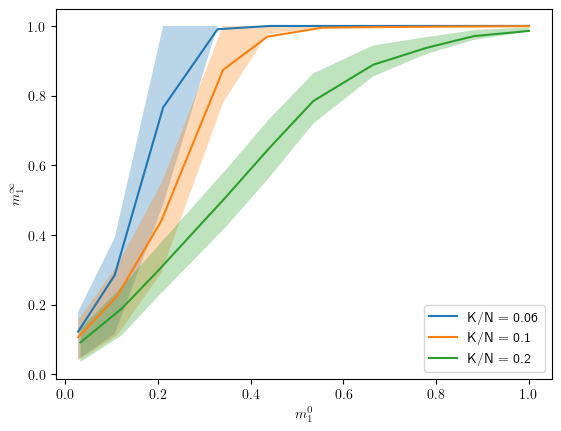

In [7]:
for idk, k in enumerate(Kv1,0):
    plt.fill_between(magn_mean_start_k[idk,:,0], magn_mean_end_k[idk,:,1], magn_mean_end_k[idk,:,3], alpha=0.3)
    plt.plot(magn_mean_start_k[idk,:,0], magn_mean_end_k[idk,:,0], label=f"K/N = {k/N}")
plt.ylabel("$m_1^{\infty}$")
plt.xlabel("$m_1^{0}$")
plt.xlabel("$m_1^{0}$")
plt.legend()
plt.show()

***

# TAM

In [ ]:
iter = 5
N = 5000
K = int(0.01*N)
L, P = [3, 2]
β, λ, h = [2.5 , 0.2, 0.2]
updates = 50

In [4]:
Tam = Networks.TAM_Network()
Tam.prepare(iter, N, K, L)
Tam.dynamics(P,β, λ, h, updates, verbose=True)
evol = Tam.Ω

100%|██████████| 50/50 [00:00<00:00, 103.88it/s]


In [6]:
evol.shape

(51, 5, 3, 50)

### Spurious state separation with TAM model

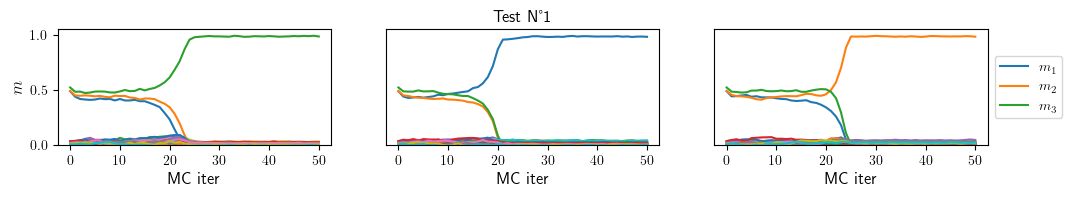

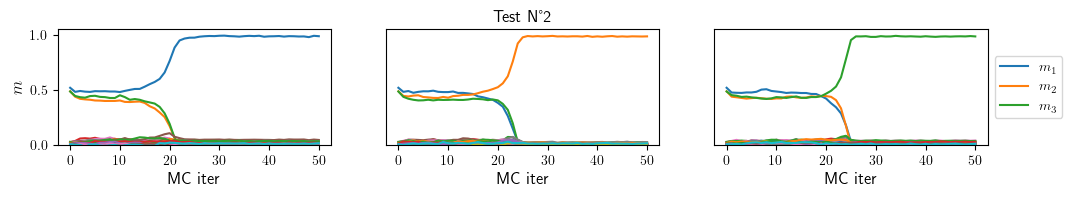

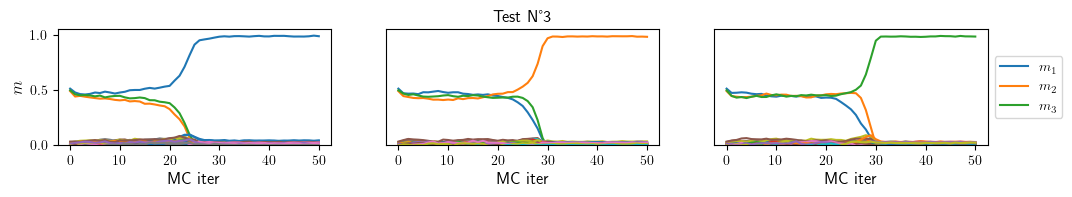

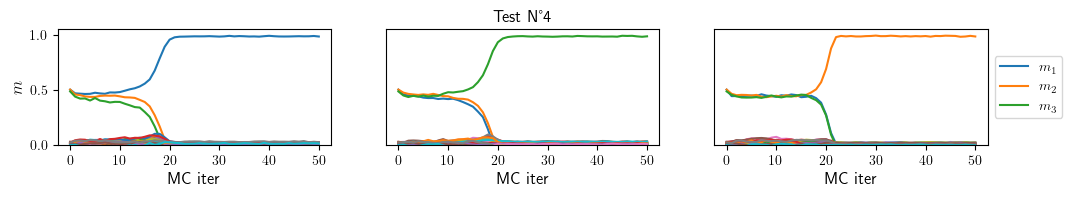

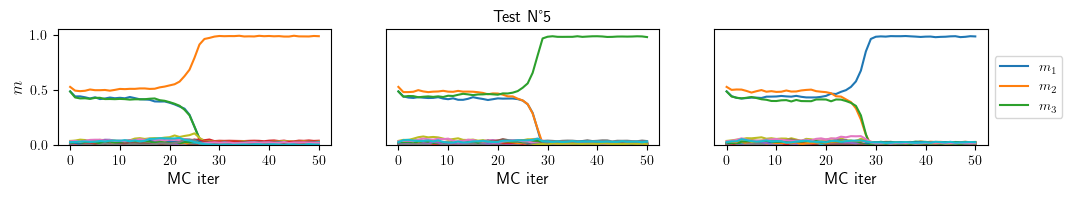

In [7]:
for n_test in range(iter):
    plt.figure(figsize=(12,1.5))
    for i in range(L):
        if i ==0:
            plt.subplot(1,L,i+1)
            plt.plot(evol[:,n_test,i,:])
            plt.ylim(0,1.05)
            plt.ylabel('$m$', size = 12)
            plt.xlabel('MC iter', size = 12)
        elif i == 2:
            plt.title(f'Test N°{n_test+1}', size = 12)
            plt.subplot(1,L,i+1)
            plt.plot(evol[:,n_test,i,0], label='$m_1$')
            plt.plot(evol[:,n_test,i,1], label='$m_2$')
            plt.plot(evol[:,n_test,i,2], label='$m_3$')
            plt.plot(evol[:,n_test,i,3:])
            plt.yticks([])
            plt.ylim(0,1.05)
            plt.xlabel('MC iter', size = 12)
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        else:
            plt.subplot(1,L,i+1)
            plt.plot(evol[:,n_test,i,:])
            plt.yticks([])
            plt.ylim(0,1.05)
            plt.xlabel('MC iter', size = 12)
    plt.show()